# モンテカルロ法の実装<br>
乱数を用いて円周率πの近似値を出してみる<br>
正方形に内接する円の中にある乱数によって生成した点と正方形内の点の比から、円周率πを求める。<br>

$$式は以下の通りになる。$$
$$πR^2:4R^2 = n:m$$
$$π = 4*n/m$$
但しn,mは正方形内に内接する円と正方形内に含まれる点の個数とする。
今回は$1/4$の円で考えてみた（負の数の乱数が出せなかったため）

In [1]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
%matplotlib inline

In [2]:
def randomplot(n):
    start = time.time()
    randomplot_list = []
    for i in n:
        x_list = np.array(np.random.random(i))
        y_list = np.array(np.random.random(i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        cir_point = 0
        for i in range(i):
            if r_list[i] <= 1:
                cir_point += 1
        square_point = i
        pi = 4*cir_point / square_point
    
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {}sec".format(time.time() - start))
        randomplot_list.append(time.time() - start)
    return randomplot_list

# $$結論$$
$$10^8くらいのオーダーだと1分ほどかかる。まず間違いなくfor文で回してるからだと思う。$$

# 修正-revision-

In [3]:
def get_pi(n):
    #n = int(input())
    start = time.time()
    get_pi_list = []
    for i in n:
        x_list = np.array(np.random.random(i))
        y_list = np.array(np.random.random(i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        #cir_point = 0
        cir_point = r_list[r_list <= 1]
        square_point = i
        pi = 4 * len(cir_point) / square_point
        
        #print("円内の点の数: ", cir_point)
        #print("円外の点の数: ", square_point)
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {}sec".format(time.time() - start))
        get_pi_list.append(time.time() - start)
    return get_pi_list

In [5]:
n = np.array([100, 1000, 10000, 100000, 1000000, 10000000, 100000000])
print("--------get_pi--------")
get_pi_list = get_pi(n)
print()
print("--------randomplot--------")
randomplot_list = randomplot(n)

--------get_pi--------
近似した円周率(点が100個の時):  2.84
かかった時間: 0.0009970664978027344sec
近似した円周率(点が1000個の時):  3.116
かかった時間: 0.0009970664978027344sec
近似した円周率(点が10000個の時):  3.1388
かかった時間: 0.003008127212524414sec
近似した円周率(点が100000個の時):  3.14944
かかった時間: 0.010970830917358398sec
近似した円周率(点が1000000個の時):  3.143144
かかった時間: 0.07779288291931152sec
近似した円周率(点が10000000個の時):  3.1412012
かかった時間: 0.6761910915374756sec
近似した円周率(点が100000000個の時):  3.14149652
かかった時間: 7.585711240768433sec

--------randomplot--------
近似した円周率(点が99個の時):  3.1515151515151514
かかった時間: 0.0sec
近似した円周率(点が999個の時):  3.171171171171171
かかった時間: 0.0009965896606445312sec
近似した円周率(点が9999個の時):  3.1127112711271128
かかった時間: 0.008975505828857422sec
近似した円周率(点が99999個の時):  3.137071370713707
かかった時間: 0.0528564453125sec
近似した円周率(点が999999個の時):  3.1435191435191436
かかった時間: 0.5076403617858887sec
近似した円周率(点が9999999個の時):  3.1414511141451116
かかった時間: 4.350364923477173sec
近似した円周率(点が99999999個の時):  3.141436911414369
かかった時間: 41.40925717353821sec


In [6]:
print(get_pi_list)
print(randomplot_list)

[0.0009970664978027344, 0.001996755599975586, 0.003008127212524414, 0.010970830917358398, 0.07779288291931152, 0.6761910915374756, 7.585711240768433]
[0.0, 0.0009965896606445312, 0.008975505828857422, 0.0528564453125, 0.5076403617858887, 4.350364923477173, 41.40925717353821]


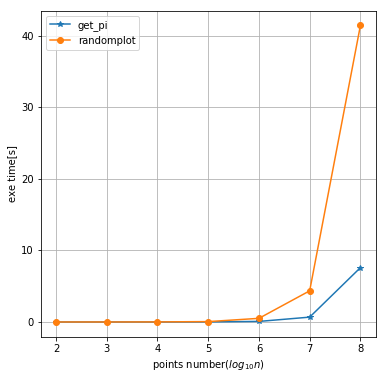

In [7]:
plt.figure(figsize=(6,6))
plt.plot(np.log10(n), np.array(get_pi_list), label="get_pi", marker="*")
plt.plot(np.log10(n), np.array(randomplot_list), label="randomplot", marker="o")
plt.xlabel("points number($log_{10}n$)")
plt.ylabel("exe time[s]")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("compare code.png", dpi=400)

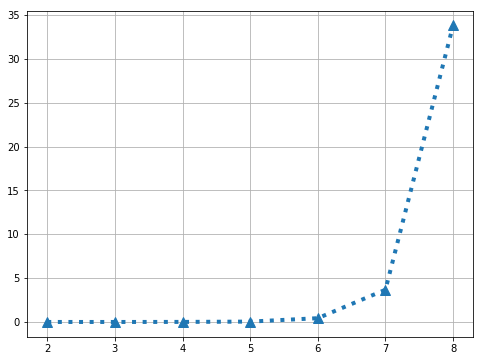

In [8]:
sa = np.array(randomplot_list) - np.array(get_pi_list)
plt.figure(figsize=(8, 6))
plt.plot(np.log10(n), sa, marker="^", markersize=10, ls=":", lw=4)
plt.grid(True)